### Importing the basic libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
### Importing the data set
df= pd.read_csv(r"C:\Users\DELL\Downloads\archive\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
#### Replacing the quality in good as 1 and bad as 0
df=df.replace({"quality":{5:0,6:0,7:1,4:0,8:1,3:0}})

In [5]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

### Checking the null Values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### There are no null values in the dataset

## Checking the datatype of the dataset

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
### Checking the black entry 
df.loc[df['quality']==" "]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


### We checked the null values and data type of the dataset. Now moving toward to the EDA

In [10]:
### Importing some basic libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib
import warnings
warnings.filterwarnings("ignore")

In [11]:
df["quality"].value_counts()


0    1382
1     217
Name: quality, dtype: int64

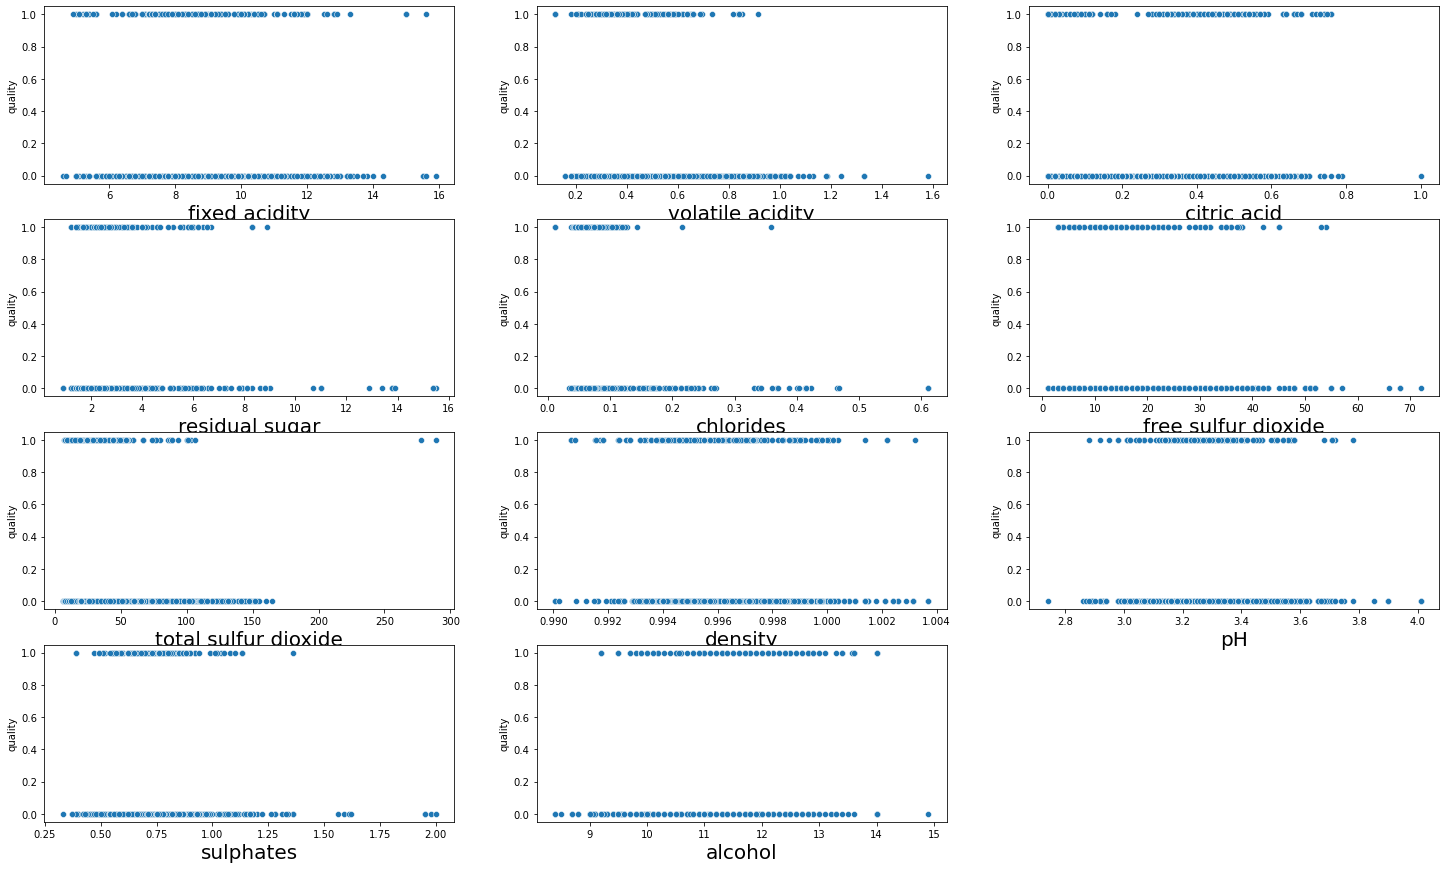

In [12]:
x= df.drop(columns='quality')
y=df["quality"]
plt.figure(figsize=(25,15), facecolor="w")
pn=1
for column in x:
    if pn <= 12:
        ax= plt.subplot(4,3, pn)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize= 20)
    pn+=1
plt.show()

### From the above ploting, I concluded that all feature has relation with target. 

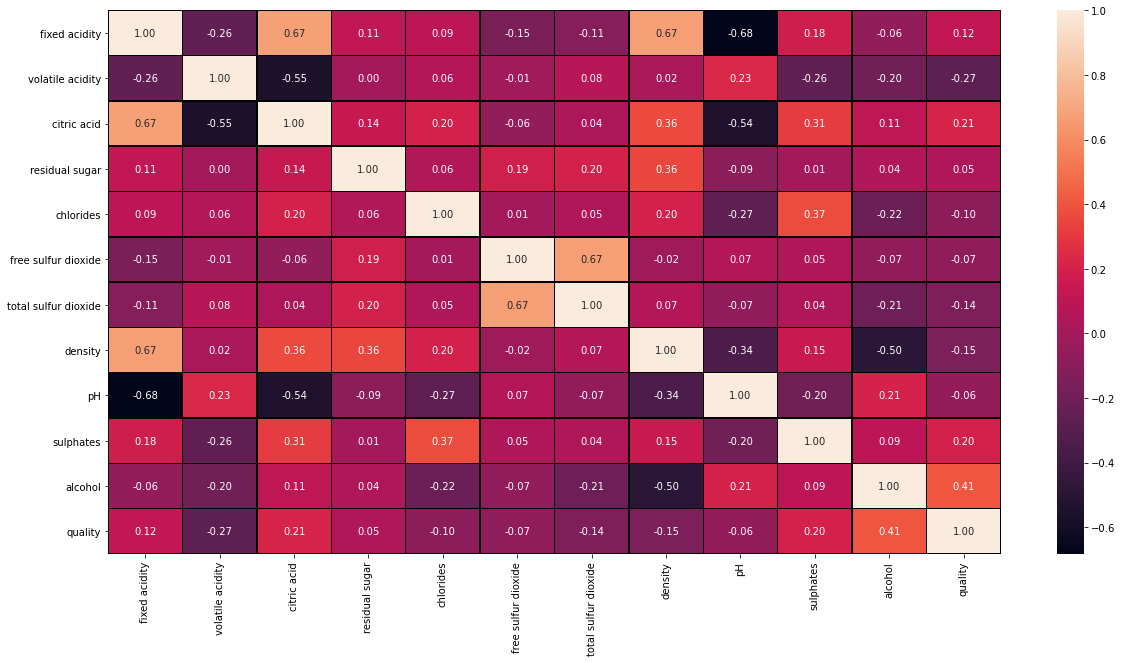

In [13]:
### Now going to check the multicollinearity through heatmap 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.show()

#### fiexed acidity has strong relation with density and citric acid(67%). So I will drop fixed acidity feature. Rest of the feature has normal relation with other feature.

Maximum relation of feature with target is  - alcohal(41%)
Minimum relation of feature with target is  - residual Sugar(5%)


<AxesSubplot:xlabel='fixed acidity', ylabel='density'>

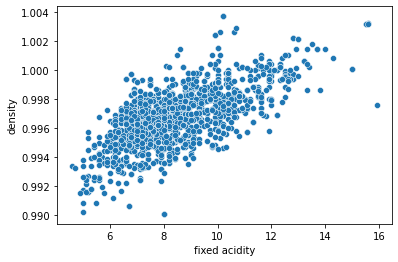

In [14]:
sns.scatterplot(x='fixed acidity', y='density', data=df)

<AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>

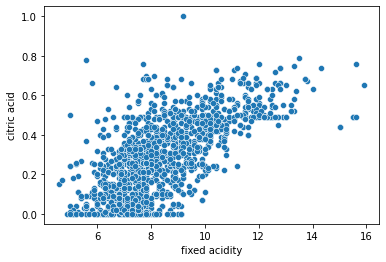

In [15]:
sns.scatterplot(x='fixed acidity', y='citric acid', data=df)

### I cross check the separately that fixed acidity has strong relation with density and citric acid. 

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
### Now checking the stats of the dataset 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


### All stats shows seem normal, So I will go forward to check the skewness of the features.

In [18]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 2.129363
dtype: float64

In [ ]:
### Keeping +-0.5 as the range for the skewness. 

### Outliers check

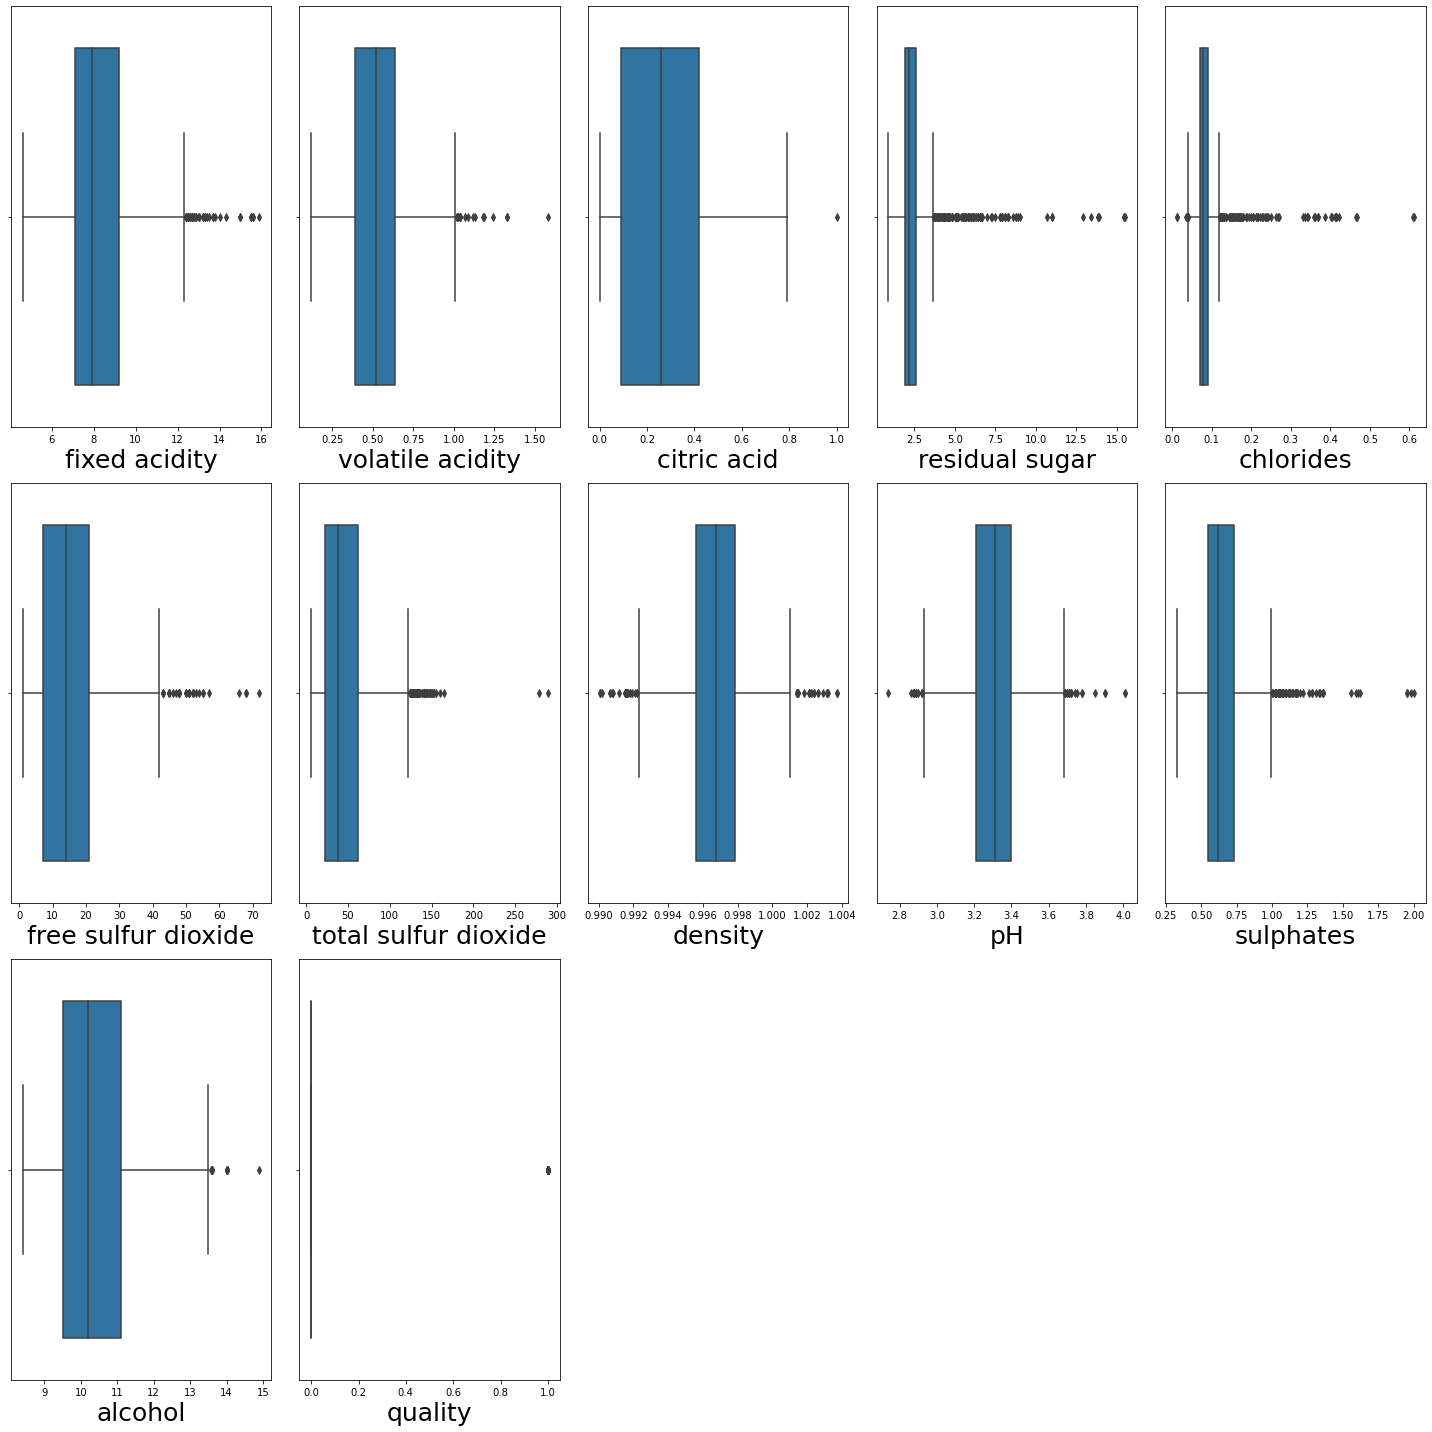

In [19]:
plt.figure(figsize=(20,20), facecolor='white')
pn = 1
for column in df:
    if pn <= 15:
        ax = plt.subplot(3,5, pn)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize =25)
    pn+=1
plt.tight_layout()

### All the features has outliers expect citirc acid and quality. So I will treat with z-score

In [20]:
df.shape

(1599, 12)

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold = 3
np.where(z<3)


(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64),
 array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))

In [23]:
df_new =df[(z<3).all(axis=1)]
df_new.shape

(1458, 12)

### Data Loss 

In [24]:
data_loss = (1599-1451)/1599*100
print('Data Loss', data_loss)

Data Loss 9.255784865540964


 Model can afford the 9% of the data loss.

### Now I am going to separate the feature and target and importing the basic libraries.

In [25]:
x= df_new.drop(columns="quality")
y=df_new['quality']
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [26]:
### Scaling the feature.
scale=StandardScaler()
x_scaled= scale.fit_transform(x)

In [27]:
### Spliting the dataset into taring and testing data.
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=.20, random_state=25)

In [28]:
#clf = DecisionTreeRegressor()
Rf = RandomForestClassifier()
Rf.fit(x_train,y_train)
pred = Rf.predict(x_test)
Rf.score(x_train,y_train)

1.0

In [29]:
acc = accuracy_score(pred,y_test)
acc

0.9212328767123288

In [33]:
from sklearn.model_selection import GridSearchCV
para = {'n_estimators':range(3,13),
       'criterion':['entropy', 'gini'],
        'max_depth':range(2,15),
    'min_samples_split':range(5,12),
    'min_samples_leaf':range(2,7)}
grid_search = GridSearchCV(estimator=Rf, param_grid=para, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 15),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(5, 12),
                         'n_estimators': range(3, 13)})

In [34]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 8}

In [35]:
Rf = RandomForestClassifier(criterion='entropy', max_depth= 10, min_samples_leaf=3, min_samples_split=6, max_leaf_nodes= 15, n_estimators=8)

In [41]:
Rf.fit(x_train,y_train)
t_sorec=Rf.score(x_train,y_train)
pred =  Rf.predict(x_test)
acc_s =accuracy_score(pred, y_test)
classi = classification_report(pred, y_test)
print("Training Score is", t_sorec, "\nAccuracy Score", acc_s, "\n\nClassification Report", classi)

Training Score is 0.9142367066895368 
Accuracy Score 0.910958904109589 

Classification Report               precision    recall  f1-score   support

           0       0.98      0.92      0.95       270
           1       0.45      0.77      0.57        22

    accuracy                           0.91       292
   macro avg       0.71      0.85      0.76       292
weighted avg       0.94      0.91      0.92       292



### The model accuracy is 92% and I also did hyperparameter tuning but model performing better without hyperparameter tuning. So, the conculsion is Model Accuracy is good.

In [228]:
### saving the model.
import pickle
filename='wine.pkl'
pickle.dump("r", open(filename, "wb"))